## Step 1: Import Libraries and Load Data

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
destinations_df = pd.read_csv("Expanded_Destinations.csv")
reviews_df = pd.read_csv("Final_Updated_Expanded_Reviews.csv")
userhistory_df = pd.read_csv("Final_Updated_Expanded_UserHistory.csv")
users_df = pd.read_csv("Final_Updated_Expanded_Users.csv")

In [2]:
destinations_df.head()

,DestinationID,Name,State,Type,Popularity,BestTimeToVisit
0,1,Taj Mahal,Uttar Pradesh,Historical,8.691906,Nov-Feb
1,2,Goa Beaches,Goa,Beach,8.605032,Nov-Mar
2,3,Jaipur City,Rajasthan,City,9.225372,Oct-Mar
3,4,Kerala Backwaters,Kerala,Nature,7.977386,Sep-Mar
4,5,Leh Ladakh,Jammu and Kashmir,Adventure,8.399822,Apr-Jun


In [3]:
reviews_df.head()

,ReviewID,DestinationID,UserID,Rating,ReviewText
0,1,178,327,2,Incredible monument!
1,2,411,783,1,Loved the beaches!
2,3,927,12,2,A historical wonder
3,4,358,959,3,Incredible monument!
4,5,989,353,2,Loved the beaches!


In [4]:
userhistory_df.head()

,HistoryID,UserID,DestinationID,VisitDate,ExperienceRating
0,1,525,760,2024-01-01,3
1,2,184,532,2024-02-15,5
2,3,897,786,2024-03-20,2
3,4,470,660,2024-01-01,1
4,5,989,389,2024-02-15,4


In [5]:
users_df.head()

,UserID,Name,Email,Preferences,Gender,NumberOfAdults,NumberOfChildren
0,1,Kavya,kavya@example.com,"Beaches, Historical",Female,1,0
1,2,Rohan,rohan@example.com,"Nature, Adventure",Male,2,2
2,3,Kavya,kavya@example.com,"City, Historical",Female,2,0
3,4,Anika,anika@example.com,"Beaches, Historical",Female,1,0
4,5,Tanvi,tanvi@example.com,"Nature, Adventure",Female,2,2


## Step 2: Data Preprocessing

In [6]:
reviews_destinations = pd.merge(reviews_df, destinations_df, on='DestinationID', how='inner')
reviews_destinations_userhistory = pd.merge(reviews_destinations, userhistory_df, on='UserID', how='inner')
df = pd.merge(reviews_destinations_userhistory, users_df, on='UserID', how='inner')
df

,ReviewID,DestinationID_x,UserID,Rating,ReviewText,Name_x,State,Type,Popularity,BestTimeToVisit,HistoryID,DestinationID_y,VisitDate,ExperienceRating,Name_y,Email,Preferences,Gender,NumberOfAdults,NumberOfChildren
0,1,178,327,2,Incredible monument!,Jaipur City,Rajasthan,City,8.544352,Oct-Mar,79,175,2024-01-01,3,Pooja,pooja@example.com,"City, Historical",Female,1,1
1,2,411,783,1,Loved the beaches!,Taj Mahal,Uttar Pradesh,Historical,8.284127,Nov-Feb,834,894,2024-03-20,2,Karan,karan@example.com,"City, Historical",Male,1,1
2,4,358,959,3,Incredible monument!,Jaipur City,Rajasthan,City,7.738761,Oct-Mar,998,660,2024-02-15,4,Ritvik,ritvik@example.com,"Nature, Adventure",Male,1,1
3,5,989,353,2,Loved the beaches!,Kerala Backwaters,Kerala,Nature,8.208088,Sep-Mar,202,894,2024-01-01,5,Isha,isha@example.com,"Nature, Adventure",Female,2,0
4,6,473,408,4,A historical wonder,Jaipur City,Rajasthan,City,8.138558,Oct-Mar,331,403,2024-01-01,2,Ishaan,ishaan@example.com,"City, Historical",Male,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,991,701,850,3,Incredible monument!,Taj Mahal,Uttar Pradesh,Historical,8.814029,Nov-Feb,138,131,2024-03-20,1,Hitesh,hitesh@example.com,"Beaches, Historical",Male,2,0
989,991,701,850,3,Incredible monument!,Taj Mahal,Uttar Pradesh,Historical,8.814029,Nov-Feb,643,761,2024-01-01,4,Hitesh,hitesh@example.com,"Beaches, Historical",Male,2,0
990,995,231,346,5,Loved the beaches!,Taj Mahal,Uttar Pradesh,Historical,7.788256,Nov-Feb,454,113,2024-01-01,2,Hitesh,hitesh@example.com,"Beaches, Historical",Male,2,2
991,995,231,346,5,Loved the beaches!,Taj Mahal,Uttar Pradesh,Historical,7.788256,Nov-Feb,556,128,2024-01-01,4,Hitesh,hitesh@example.com,"Beaches, Historical",Male,2,2


In [7]:
df.shape

(993, 20)

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.isnull().sum()

ReviewID            0
DestinationID_x     0
UserID              0
Rating              0
ReviewText          0
Name_x              0
State               0
Type                0
Popularity          0
BestTimeToVisit     0
HistoryID           0
DestinationID_y     0
VisitDate           0
ExperienceRating    0
Name_y              0
Email               0
Preferences         0
Gender              0
NumberOfAdults      0
NumberOfChildren    0
dtype: int64

## 3. Data Visualization

In [10]:
df

,ReviewID,DestinationID_x,UserID,Rating,ReviewText,Name_x,State,Type,Popularity,BestTimeToVisit,HistoryID,DestinationID_y,VisitDate,ExperienceRating,Name_y,Email,Preferences,Gender,NumberOfAdults,NumberOfChildren
0,1,178,327,2,Incredible monument!,Jaipur City,Rajasthan,City,8.544352,Oct-Mar,79,175,2024-01-01,3,Pooja,pooja@example.com,"City, Historical",Female,1,1
1,2,411,783,1,Loved the beaches!,Taj Mahal,Uttar Pradesh,Historical,8.284127,Nov-Feb,834,894,2024-03-20,2,Karan,karan@example.com,"City, Historical",Male,1,1
2,4,358,959,3,Incredible monument!,Jaipur City,Rajasthan,City,7.738761,Oct-Mar,998,660,2024-02-15,4,Ritvik,ritvik@example.com,"Nature, Adventure",Male,1,1
3,5,989,353,2,Loved the beaches!,Kerala Backwaters,Kerala,Nature,8.208088,Sep-Mar,202,894,2024-01-01,5,Isha,isha@example.com,"Nature, Adventure",Female,2,0
4,6,473,408,4,A historical wonder,Jaipur City,Rajasthan,City,8.138558,Oct-Mar,331,403,2024-01-01,2,Ishaan,ishaan@example.com,"City, Historical",Male,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,991,701,850,3,Incredible monument!,Taj Mahal,Uttar Pradesh,Historical,8.814029,Nov-Feb,138,131,2024-03-20,1,Hitesh,hitesh@example.com,"Beaches, Historical",Male,2,0
989,991,701,850,3,Incredible monument!,Taj Mahal,Uttar Pradesh,Historical,8.814029,Nov-Feb,643,761,2024-01-01,4,Hitesh,hitesh@example.com,"Beaches, Historical",Male,2,0
990,995,231,346,5,Loved the beaches!,Taj Mahal,Uttar Pradesh,Historical,7.788256,Nov-Feb,454,113,2024-01-01,2,Hitesh,hitesh@example.com,"Beaches, Historical",Male,2,2
991,995,231,346,5,Loved the beaches!,Taj Mahal,Uttar Pradesh,Historical,7.788256,Nov-Feb,556,128,2024-01-01,4,Hitesh,hitesh@example.com,"Beaches, Historical",Male,2,2


C:\Users\dell\AppData\Local\Temp\ipykernel_20612\3628788745.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Popularity', y='Name', data=destinations_df.sort_values(by='Popularity', ascending=False), palette='viridis')


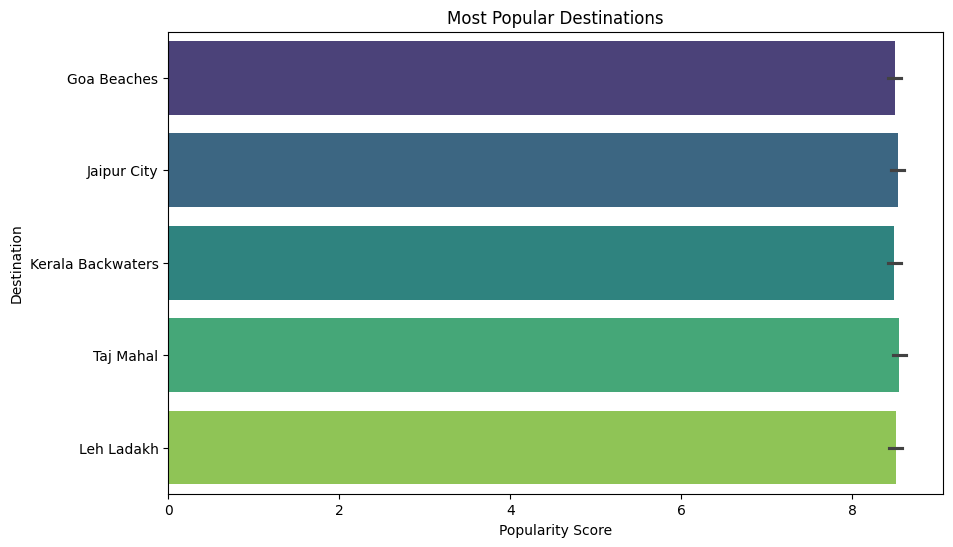

In [11]:
# Destination Popularity
plt.figure(figsize=(10, 6))
sns.barplot(x='Popularity', y='Name', data=destinations_df.sort_values(by='Popularity', ascending=False), palette='viridis')
plt.title('Most Popular Destinations')
plt.xlabel('Popularity Score')
plt.ylabel('Destination')
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_20612\1226746097.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Type', data=destinations_df, order=destinations_df['Type'].value_counts().index, palette='coolwarm')


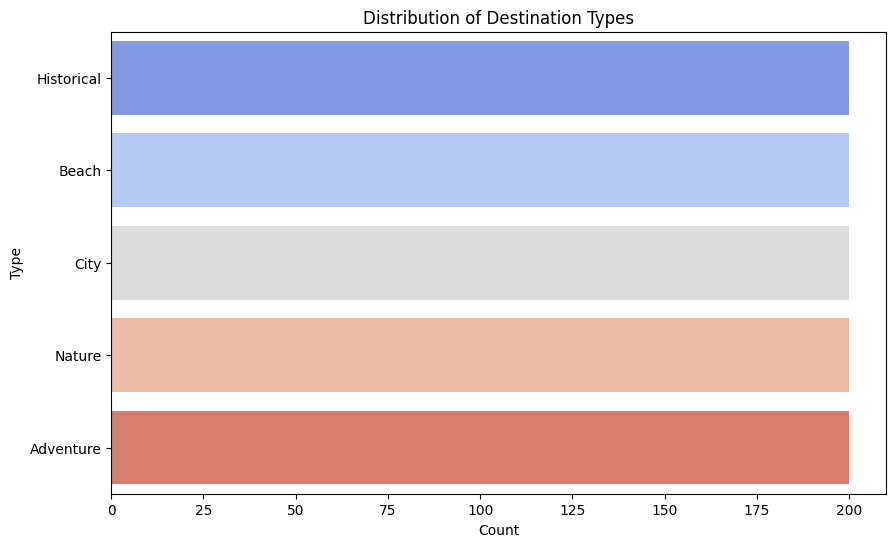

In [12]:
# Destination Types Distribution
plt.figure(figsize=(10, 6))
sns.countplot(y='Type', data=destinations_df, order=destinations_df['Type'].value_counts().index, palette='coolwarm')
plt.title('Distribution of Destination Types')
plt.xlabel('Count')
plt.ylabel('Type')
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_20612\1939569522.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='BestTimeToVisit', data=destinations_df, order=destinations_df['BestTimeToVisit'].value_counts().index, palette='magma')


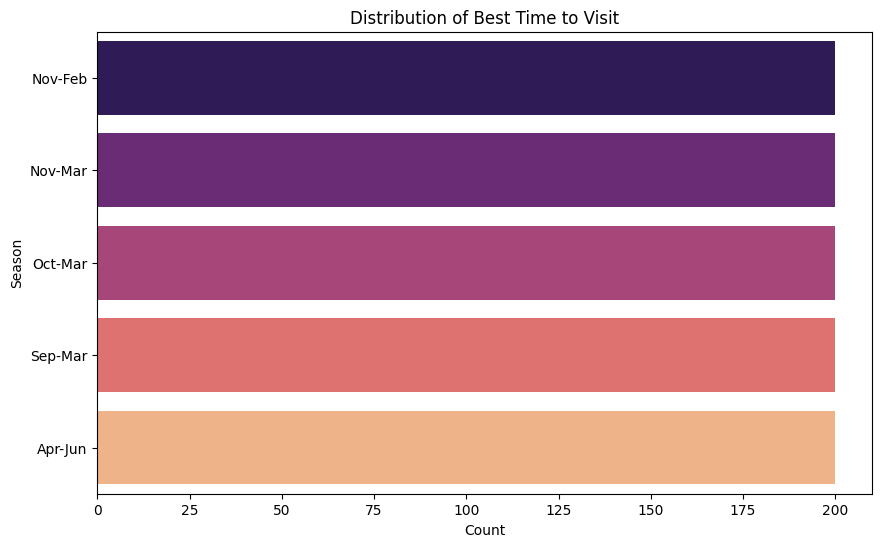

In [13]:
# Best Time to Visit Distribution
plt.figure(figsize=(10, 6))
sns.countplot(y='BestTimeToVisit', data=destinations_df, order=destinations_df['BestTimeToVisit'].value_counts().index, palette='magma')
plt.title('Distribution of Best Time to Visit')
plt.xlabel('Count')
plt.ylabel('Season')
plt.show()

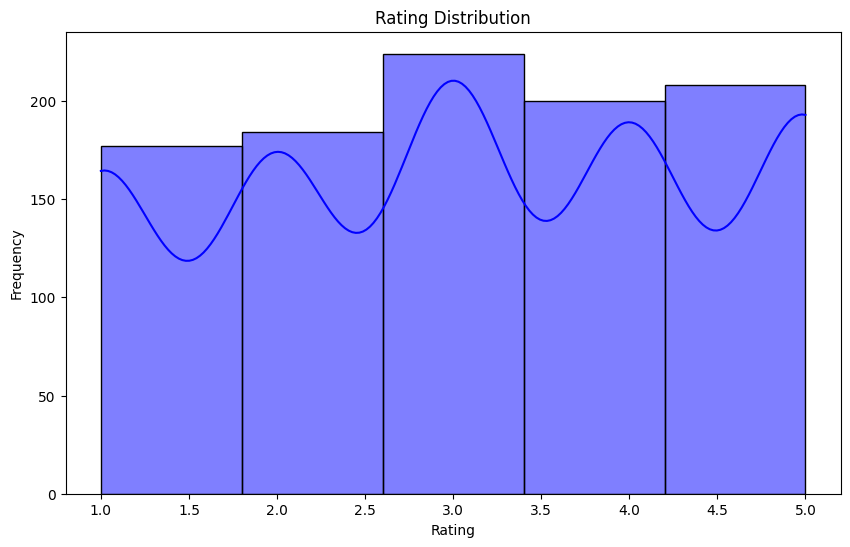

In [14]:
# Rating Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=5, kde=True, color='blue')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

## 4. Content Based Recommendation System

### 4.1: Preparing the Destination Feature
We'll use "Type", "State" and "BestTimeToVisit" columns to create features for content-based filtering.

In [15]:
df['features'] = df['Type'] + " " + df['State'] + " " + df['BestTimeToVisit'] + " " + df['Preferences']
df

,ReviewID,DestinationID_x,UserID,Rating,ReviewText,Name_x,State,Type,Popularity,BestTimeToVisit,...,DestinationID_y,VisitDate,ExperienceRating,Name_y,Email,Preferences,Gender,NumberOfAdults,NumberOfChildren,features
0,1,178,327,2,Incredible monument!,Jaipur City,Rajasthan,City,8.544352,Oct-Mar,...,175,2024-01-01,3,Pooja,pooja@example.com,"City, Historical",Female,1,1,"City Rajasthan Oct-Mar City, Historical"
1,2,411,783,1,Loved the beaches!,Taj Mahal,Uttar Pradesh,Historical,8.284127,Nov-Feb,...,894,2024-03-20,2,Karan,karan@example.com,"City, Historical",Male,1,1,"Historical Uttar Pradesh Nov-Feb City, Historical"
2,4,358,959,3,Incredible monument!,Jaipur City,Rajasthan,City,7.738761,Oct-Mar,...,660,2024-02-15,4,Ritvik,ritvik@example.com,"Nature, Adventure",Male,1,1,"City Rajasthan Oct-Mar Nature, Adventure"
3,5,989,353,2,Loved the beaches!,Kerala Backwaters,Kerala,Nature,8.208088,Sep-Mar,...,894,2024-01-01,5,Isha,isha@example.com,"Nature, Adventure",Female,2,0,"Nature Kerala Sep-Mar Nature, Adventure"
4,6,473,408,4,A historical wonder,Jaipur City,Rajasthan,City,8.138558,Oct-Mar,...,403,2024-01-01,2,Ishaan,ishaan@example.com,"City, Historical",Male,2,0,"City Rajasthan Oct-Mar City, Historical"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,991,701,850,3,Incredible monument!,Taj Mahal,Uttar Pradesh,Historical,8.814029,Nov-Feb,...,131,2024-03-20,1,Hitesh,hitesh@example.com,"Beaches, Historical",Male,2,0,"Historical Uttar Pradesh Nov-Feb Beaches, Hist..."
989,991,701,850,3,Incredible monument!,Taj Mahal,Uttar Pradesh,Historical,8.814029,Nov-Feb,...,761,2024-01-01,4,Hitesh,hitesh@example.com,"Beaches, Historical",Male,2,0,"Historical Uttar Pradesh Nov-Feb Beaches, Hist..."
990,995,231,346,5,Loved the beaches!,Taj Mahal,Uttar Pradesh,Historical,7.788256,Nov-Feb,...,113,2024-01-01,2,Hitesh,hitesh@example.com,"Beaches, Historical",Male,2,2,"Historical Uttar Pradesh Nov-Feb Beaches, Hist..."
991,995,231,346,5,Loved the beaches!,Taj Mahal,Uttar Pradesh,Historical,7.788256,Nov-Feb,...,128,2024-01-01,4,Hitesh,hitesh@example.com,"Beaches, Historical",Male,2,2,"Historical Uttar Pradesh Nov-Feb Beaches, Hist..."


In [16]:
vectorizer = TfidfVectorizer(stop_words='english')
destination_features = vectorizer.fit_transform(df['features'])
destination_features.toarray()

array([[0.        , 0.        , 0.        , ..., 0.47425946, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.4433145 ],
       [0.34511087, 0.        , 0.        , ..., 0.51672584, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.43591168],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.43591168],
       [0.        , 0.        , 0.        , ..., 0.47425946, 0.        ,
        0.        ]], shape=(993, 20))

In [17]:
cosine_sim = cosine_similarity(destination_features, destination_features)
cosine_sim

array([[1.        , 0.30209204, 0.80314548, ..., 0.10628488, 0.10628488,
        1.        ],
       [0.30209204, 1.        , 0.10568682, ..., 0.89329488, 0.89329488,
        0.30209204],
       [0.80314548, 0.10568682, 1.        , ..., 0.        , 0.        ,
        0.80314548],
       ...,
       [0.10628488, 0.89329488, 0.        , ..., 1.        , 1.        ,
        0.10628488],
       [0.10628488, 0.89329488, 0.        , ..., 1.        , 1.        ,
        0.10628488],
       [1.        , 0.30209204, 0.80314548, ..., 0.10628488, 0.10628488,
        1.        ]], shape=(993, 993))

### Step 4.2: Recommendation Function
Based on the cosine similarity matrix, we can recommend destinations similar to the ones the user has liked in the past

In [18]:
def recommend_destinations(user_id, userhistory_df, destinations_df, cosine_sim):
    """
    Recommends top 5 destinations for a given user based on similarity scores.
    Args:
    - user_id: ID of the user.
    - userhistory_df: User history DataFrame containing 'UserID' and 'DestinationID'.
    - destinations_df: Destinations DataFrame containing destination details.
    - cosine_sim: Cosine similarity matrix for destinations.
    Returns:
    - DataFrame with recommended destinations and their details.
    """

    # Get the destinations the user has visited
    visited_destinations = userhistory_df[userhistory_df['UserID'] == user_id]['DestinationID'].values
    
    # Calculate similarity scores for visited destinations
    similar_scores = np.sum(cosine_sim[visited_destinations - 1], axis=0)
    
    # Recommend the top 5 destinations the user hasn't visited yet
    recommended_destinations_idx = np.argsort(similar_scores)[::-1]
    
    recommendations = []
    for idx in recommended_destinations_idx:
        if destinations_df.iloc[idx]['DestinationID'] not in visited_destinations:
            # Append detailed information for each recommendation
            recommendations.append(destinations_df.iloc[idx][['DestinationID', 'Name', 'State', 'Type', 'Popularity', 'BestTimeToVisit']].to_dict())
        if len(recommendations) >= 5:
            break
    
    # Convert recommendations to a DataFrame
    return pd.DataFrame(recommendations)


# Example: Recommend destinations for user with ID 1
recommended_destinations = recommend_destinations(20, userhistory_df, destinations_df, cosine_sim)
# Display recommendations
recommended_destinations


,DestinationID,Name,State,Type,Popularity,BestTimeToVisit
0,960,Leh Ladakh,Jammu and Kashmir,Adventure,8.925500,Apr-Jun
1,986,Taj Mahal,Uttar Pradesh,Historical,8.108715,Nov-Feb
2,162,Goa Beaches,Goa,Beach,7.544770,Nov-Mar
3,163,Jaipur City,Rajasthan,City,8.168781,Oct-Mar
4,15,Leh Ladakh,Jammu and Kashmir,Adventure,9.297389,Apr-Jun


In [19]:
recommended_destinations = recommend_destinations(1, userhistory_df, destinations_df, cosine_sim)
# Display recommendations
recommended_destinations


,DestinationID,Name,State,Type,Popularity,BestTimeToVisit
0,64,Kerala Backwaters,Kerala,Nature,7.995382,Sep-Mar
1,62,Goa Beaches,Goa,Beach,9.379787,Nov-Mar
2,63,Jaipur City,Rajasthan,City,9.202094,Oct-Mar
3,41,Taj Mahal,Uttar Pradesh,Historical,9.452056,Nov-Feb
4,42,Goa Beaches,Goa,Beach,8.854828,Nov-Mar


## Step 5: Collaborative Filtering
We’ll create a matrix where rows represent users, and columns represent destinations. The values will represent the ratings or experience of the user for each destination.

### Step 5.1: Create a User-Item Matrix

In [20]:
df.columns

Index(['ReviewID', 'DestinationID_x', 'UserID', 'Rating', 'ReviewText',
       'Name_x', 'State', 'Type', 'Popularity', 'BestTimeToVisit', 'HistoryID',
       'DestinationID_y', 'VisitDate', 'ExperienceRating', 'Name_y', 'Email',
       'Preferences', 'Gender', 'NumberOfAdults', 'NumberOfChildren',
       'features'],
      dtype='object')

In [21]:
user_item_matrix = userhistory_df.pivot(index='UserID', columns='DestinationID', values='ExperienceRating')
user_item_matrix.fillna(0, inplace=True)
user_item_matrix

DestinationID,2,3,4,5,6,7,8,9,10,11,...,987,988,990,991,993,994,996,997,998,1000
UserID,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
991,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
user_similarity = cosine_similarity(user_item_matrix)
user_similarity

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], shape=(642, 642))

### Step 5.2: Cosine Similarity Between Users
We will compute the cosine similarity between users based on the user-item matrix

In [24]:
# Function to recommend destinations based on user similarity
def collaborative_recommend(user_id, user_similarity, user_item_matrix, destinations_df):
    """
    Recommends destinations based on collaborative filtering.

    Args:
    - user_id: ID of the user for whom recommendations are to be made.
    - user_similarity: Cosine similarity matrix for users.
    - user_item_matrix: User-item interaction matrix (e.g., ratings or preferences).
    - destinations_df: DataFrame containing destination details.

    Returns:
    - DataFrame with recommended destinations and their details.
    """
    # Find similar users
    similar_users = user_similarity[user_id - 1]
    
    # Get the top 5 most similar users
    similar_users_idx = np.argsort(similar_users)[::-1][1:6]
    
    # Get the destinations liked by similar users
    similar_user_ratings = user_item_matrix.iloc[similar_users_idx].mean(axis=0)
    
    # Recommend the top 5 destinations
    recommended_destinations_ids = similar_user_ratings.sort_values(ascending=False).head(5).index
    
    # Filter the destinations DataFrame to include detailed information
    recommendations = destinations_df[destinations_df['DestinationID'].isin(recommended_destinations_ids)][[
        'DestinationID', 'Name', 'State', 'Type', 'Popularity', 'BestTimeToVisit'
    ]]
    
    return recommendations

# Example: Collaborative recommendations for user 1
collaborative_recommendations = collaborative_recommend(15, user_similarity, user_item_matrix, destinations_df)

# Display recommendations
collaborative_recommendations

,DestinationID,Name,State,Type,Popularity,BestTimeToVisit
80,81,Taj Mahal,Uttar Pradesh,Historical,8.113730,Nov-Feb
388,389,Kerala Backwaters,Kerala,Nature,9.409146,Sep-Mar
466,467,Goa Beaches,Goa,Beach,8.025486,Nov-Mar
778,779,Kerala Backwaters,Kerala,Nature,8.861507,Sep-Mar
940,941,Taj Mahal,Uttar Pradesh,Historical,8.645047,Nov-Feb


In [25]:
collaborative_recommendations = collaborative_recommend(11, user_similarity, user_item_matrix, destinations_df)

# Display recommendations
collaborative_recommendations

,DestinationID,Name,State,Type,Popularity,BestTimeToVisit
300,301,Taj Mahal,Uttar Pradesh,Historical,8.634309,Nov-Feb
345,346,Taj Mahal,Uttar Pradesh,Historical,8.969951,Nov-Feb
367,368,Jaipur City,Rajasthan,City,8.008252,Oct-Mar
724,725,Leh Ladakh,Jammu and Kashmir,Adventure,9.339552,Apr-Jun
969,970,Leh Ladakh,Jammu and Kashmir,Adventure,9.013101,Apr-Jun


In [26]:
collaborative_recommendations = collaborative_recommend(100, user_similarity, user_item_matrix, destinations_df)

# Display recommendations
collaborative_recommendations

,DestinationID,Name,State,Type,Popularity,BestTimeToVisit
80,81,Taj Mahal,Uttar Pradesh,Historical,8.113730,Nov-Feb
388,389,Kerala Backwaters,Kerala,Nature,9.409146,Sep-Mar
466,467,Goa Beaches,Goa,Beach,8.025486,Nov-Mar
778,779,Kerala Backwaters,Kerala,Nature,8.861507,Sep-Mar
940,941,Taj Mahal,Uttar Pradesh,Historical,8.645047,Nov-Feb
